# This is a complete rewrite of wholefoodsproject.ipynb

Originally the previous `wholefoodsproject.ipynb` shows an exploration of data that was scraped through the (all products) page, the downside is that there were no categories.
In this version we scrape per category, rewrite all of the code for automated data cleaning and reinitialize our visualizations.

In [5]:
import os, random, sys, time 
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

from selenium.webdriver.chrome.options import Options
#options = Options()
#options.add_argument('--headless')
#options.add_argument('--disable-gpu')

In [6]:
try:
    browser = webdriver.Chrome('C:/Users/Water/Desktop/chromedriver.exe') # Chrome Driver
    browser.get('https://www.wholefoodsmarket.com/products/all-products?featured=on-sale') # Website Link
    browser.find_element_by_xpath("//input[@id='pie-store-finder-modal-search-field']").send_keys(19073) # Zip code
    time.sleep(2.5) # lag for 3 seconds to allow elements to load
    browser.find_elements_by_class_name("wfm-search-bar--list_item")[0].click()
except:
    print('invalid zipcode')
time.sleep(2)

browser.get('https://www.wholefoodsmarket.com/products/produce?featured=on-sale') # Website Link
#---------------------
# Continously loads all possible product data until no more data exists
# Sometimes may take some time if there are many products on sale
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
produce = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/dairy-eggs?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
dairy_eggs = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/meat?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
meat = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/prepared-foods?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
prepared_foods = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/pantry-essentials?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
pantry_essentials = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/breads-rolls-bakery?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
bread_rolls_bakery = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/desserts?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
desserts = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/body-care?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
body_care = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/supplements?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
supplements = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/frozen-foods?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
frozen_foods = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/snacks-chips-salsas-dips?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
snacks_chips_salsas_dips = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/seafood?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
seafood = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/beverages?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
Beverages = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/beauty?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
beauty = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/floral?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
floral = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split

browser.get('https://www.wholefoodsmarket.com/products/lifestyle?featured=on-sale')
try:
    load = browser.find_element_by_xpath("//span[contains(text(),'Load more')]") 
    while True:
        load.click()
        time.sleep(2.5) # Must have a 2 sec time lag so the 'load more' button can reappear
except:
    print("Results Filled") # If all possible data is populated
all_items = browser.find_elements_by_xpath("//div[@data-testid='product-tile']") # Pull all product elements by xpath
lifestyle = [items.text.splitlines() for items in all_items] # Create a list comprehension of all product elements with text shown and lines split
print('There are ' + str(len(lifestyle) + len(produce) + len(dairy_eggs) + len(meat) + len(prepared_foods) + len(pantry_essentials) + len(bread_rolls_bakery) + len(desserts) + len(body_care) + len(supplements) + len(frozen_foods) + len(snacks_chips_salsas_dips) + len(seafood) + len(Beverages) + len(beauty) + len(floral)) + ' products on sale queried.')

Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled
Results Filled


In [9]:
list_of_categories = ['lifestyle', 'produce', 'dairy_eggs', 'meat', 'prepared_foods', 'pantry_essentials', 'bread_rolls_bakery', 'desserts', 'body_care', 'supplements', 'frozen_foods', 'snacks_chips_salsas_dips', 'seafood', 'Beverages', 'beauty', 'floral']

d = {"company":[], "product":[], "regular":[], "sale":[], "prime":[], "category":[]} # Create a Dict


for category in list_of_categories:
    for i in range(len(globals()[category])):                        # At the range of the length of all items (will loop i times)
            d["company"].append(globals()[category][i][-5])      # Append respective indexed data in list_of_items[i] for each column
            d["product"].append(globals()[category][i][-4])      # | -
            d["regular"].append(globals()[category][i][-3][8:])  # | * 
            d["sale"].append(globals()[category][i][-2][10:])    # | /
            d["prime"].append(globals()[category][i][-1][18:])
            d["category"].append(str(category))   # | \
#------------------------------------------------------# | /
if len(d['company']) == len(d['product']) == len(d['regular']) == len(d['sale']) == len(d['category']):  # Verify that the length of each column is == to each other, otherwise the dataframe wont be populated   
    print("All column lengths are equal, there are " + str(len(d['company'])) + " products on sale today.")
else:                                                  # | \        
    print("Error, column lengths are not equal.")      # | /
pd.set_option("display.max_rows", 500)                 # | \ Change Pandas option to view more rows of the df
df = pd.DataFrame.from_dict(d)                         # | / Turn our Dict to a Pandas DataFrame  


if df['product'].str.contains('Original Vegan Bagels, 15.87 oz').any():                         
    ix = df[df['product'].str.contains('Original Vegan Bagels, 15.87 oz')].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Soozy's"

if df['product'].str.contains('Original Sandwich Bread, 22.2 oz').any():                         
    ix = df[df['product'].str.contains('Original Sandwich Bread, 22.2 oz')].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Soozy's"

if df['product'].str.contains('Arctic Char Fillet').any():                         
    ix = df[df['product'].str.contains('Arctic Char Fillet')].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Whole Foods Market"

# Data cleaning/shifting for products by Brita
if df['company'].str.contains('/').any() and df['product'].str.contains('Brita').any():
    print('data error check company name containing "/" and "Brita"')

# Data cleaning/shifting for products
if df['product'].str.contains("Easy Peel White Shrimp 8-12 Count").any():
    ix = df[df['product'].str.contains("Easy Peel White Shrimp 8-12 Count")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Whole Foods Market"

if df['product'].str.contains("Organic Freeze Dried Chives, 0.14 oz").any():
    ix = df[df['product'].str.contains("Organic Freeze Dried Chives, 0.14 oz")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Green Garden"

if df['product'].str.contains("Organic Freeze Dried Thyme, 0.26 oz").any():
    ix = df[df['product'].str.contains("Organic Freeze Dried Thyme, 0.26 oz")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Green Garden"

if df['product'].str.contains("Organic Mild Plant Taco Meatless Crumbles").any():
    ix = df[df['product'].str.contains("Organic Mild Plant Taco Meatless Crumbles")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "PLANT BOSS"

if df['product'].str.contains("Organic Multicolor Kale").any():
    ix = df[df['product'].str.contains("Organic Multicolor Kale")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Whole Foods Market"        

# Data cleaning/shifting for products by Soozy's
if df['product'].str.contains("Soozy's Birthday Cake Cookies").any():
    ix = df[df['product'].str.contains("Soozy's Birthday Cake Cookies")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Soozy's"

if df['product'].str.contains("Soozys Chocolate Chip Cookies").any():
    ix = df[df['product'].str.contains("Soozys Chocolate Chip Cookies")].index
    for i in range(len(ix)):
        df.loc[ix[i],'company'] = "Soozy's"

# Data cleaning/shifting for products by Whole Foods Market
if df['product'].str.contains('Whole Foods Market').any():
    print('data error check product name containing "whole foods market"')

#---------------Any of these are definitely under the lifestyle category//all waterbottles------#

# Data cleaning/shifting for products by CAMELBAK
if df['product'].str.contains('CAMELBAK').any():
    print('data error check product name containing "CAMELBAK"')

# Data cleaning/shifting for products by NEW WAVE
if df['product'].str.contains('NEW WAVE').any():
    print('data error check product name containing "NEW WAVE"')

# Data cleaning/shifting for products by Enviro
if df['product'].str.contains('Enviro').any():
    print('data error check product name containing "Enviro"')

# Data cleaning/shifting for products by HYDRO FLASK
if df['product'].str.contains('HYDRO FLASK').any():
    print('data error check product name containing "HYDRO FLASK"')

# Data cleaning/shifting for products by SUNDESA
if df['product'].str.contains('SUNDESA').any():
    print('data error check product name containing "SUNDESA"')

if df['regular'].str.contains('9¢').any():
    ix = df[df['regular'].str.contains('9¢')].index
    for i in range(len(ix)):
        df.loc[ix[i], 'regular'] = '9' + df.loc[ix[i], 'regular']

if df['company'].str.contains('365').any():
    ix = df[df['company'].str.contains('365')].index
    for i in range(len(ix)):
        df.loc[ix[i], 'company'] = 'Whole Foods Market'

df['sale'] = df['sale'].str.replace(r'$', '', regex=True)
df['prime'] = df['prime'].str.replace(r'$', '', regex=True)
df['regular'] = df['regular'].str.replace(r'$', '', regex=True)

if df['regular'].str.contains('/lb').any():
    ix = df[df['regular'].str.contains('/lb')].index
    for i in range(len(ix)):
        df.loc[ix[i], 'regular'] = df.loc[ix[i], 'regular'].replace(r'/lb','')
if df['sale'].str.contains('/lb').any():
    ix = df[df['sale'].str.contains('/lb')].index
    for i in range(len(ix)):
        df.loc[ix[i], 'sale'] = df.loc[ix[i], 'sale'].replace(r'/lb','')
if df['prime'].str.contains('/lb').any():
    ix = df[df['prime'].str.contains('/lb')].index
    for i in range(len(ix)):
        df.loc[ix[i], 'prime'] = df.loc[ix[i], 'prime'].replace(r'/lb','')

d = df.to_dict('list') # Take our cleaned dataframe and convert it to a dictionary for more cleaning

for i in range(len(d['sale'])):                                                
    if isinstance(d['sale'][i], str) and 'for' in d['sale'][i].split():  
        d['sale'][i] = float(d['sale'][i].split()[2]) / float(d['sale'][i].split()[0])

for i in range(len(d['prime'])):                                                
        if isinstance(d['prime'][i], str) and 'for' in d['prime'][i].split():  
            d['prime'][i] = float(d['prime'][i].split()[2]) / float(d['prime'][i].split()[0])

df = pd.DataFrame.from_dict(d) # turn our dict back into a dataframe



for i in range(len(df[df['sale'].str.contains('¢', na=False)].index)): # Append a '.' to all values that have a cents symbol
    ix = df[df['sale'].str.contains('¢', na=False)].index
    df.loc[ix[i]][3] = '.' + df.loc[ix[i]][3]

for i in range(len(ix)):
    ix = df[df['prime'].str.contains('¢', na=False)].index
    df.loc[ix[i]][4] = '.' + df.loc[ix[i]][4]

try:
    for i in range(len(ix)):
        ix = df[df['regular'].str.contains('¢', na=False)].index
        df.loc[ix[i]][2] = '.' + df.loc[ix[i]][2]
except:
    pass

ix = df[df['prime'].str.contains('¢', na=False)].index
for i in range(len(ix)):
    df.loc[ix[i]][4] = df.loc[ix[i]][4].replace('¢', '')

ix = df[df['regular'].str.contains('¢', na=False)].index
for i in range(len(ix)):
    df.loc[ix[i]][2] = df.loc[ix[i]][2].replace('¢', '')

ix = df[df['sale'].str.contains('¢', na=False)].index
for i in range(len(ix)):
    df.loc[ix[i]][3] = df.loc[ix[i]][3].replace('¢', '')
df = df.sort_index()  

All column lengths are equal, there are 1586 products for sale today.


In [10]:
df["regular"] = pd.to_numeric(df["regular"]) # change columns to numeric for visualization
df["sale"] = pd.to_numeric(df["sale"])
df["prime"] = pd.to_numeric(df["prime"])
df['sale_discount'] = 1-df['sale']/df['regular'] # create new feature to show percentage discount of sale price
df['prime_discount'] = 1-df['prime']/df['regular'] # create new feature to show percentage discount of prime price
df['prime_sale_difference'] = df['prime_discount'] - df['sale_discount'] # create new feature to show the difference between sale discount and prime discount
df['discount_bins'] = pd.cut(df.prime_discount, [0,.25,.50,.75, 1], labels=['0% to 25%', '25% to 50%', '50% to 75%', '75% or more'])
df = df.sort_values(by='prime_discount', ascending=False) # sort by difference

In [11]:
df

,company,product,regular,sale,prime,category,sale_discount,prime_discount,prime_sale_difference,discount_bins
521,Brekki,Overnight Oats With Ancient Grains Buleberries...,2.99,1.50,1.35,pantry_essentials,0.498328,0.548495,0.050167,50% to 75%
518,Brekki,"Banana And Maple Brown Sugar Overnight Oats, 5...",2.99,1.50,1.35,pantry_essentials,0.498328,0.548495,0.050167,50% to 75%
562,Brekki,"Strawberry Overnight Oats, 5.3 oz",2.99,1.50,1.35,pantry_essentials,0.498328,0.548495,0.050167,50% to 75%
501,Brekki,"Original Overnight Oats, 5.3 oz",2.99,1.50,1.35,pantry_essentials,0.498328,0.548495,0.050167,50% to 75%
587,Dave's Killer Bread,Organic Thin-sliced 21 Whole Grains And Seeds ...,5.49,2.79,2.51,bread_rolls_bakery,0.491803,0.542805,0.051002,50% to 75%
...,...,...,...,...,...,...,...,...,...,...
240,Field Roast,Plant-Based Buffalo Wings,6.49,6.29,5.66,meat,0.030817,0.127889,0.097072,0% to 25%
916,Primal Kitchen,"Chicken Pesto, 10 oz",6.49,6.29,5.66,frozen_foods,0.030817,0.127889,0.097072,0% to 25%
931,Primal Kitchen,"Beef & Mushroom Bowl, 11 oz",6.49,6.29,5.66,frozen_foods,0.030817,0.127889,0.097072,0% to 25%
946,Primal Kitchen,"Chicken Panang Curry, 10 oz",6.49,6.29,5.66,frozen_foods,0.030817,0.127889,0.097072,0% to 25%


In [30]:
df.to_csv('Cleaned_WholeFoods_Sale_Data.CSV')

array([[<AxesSubplot:title={'center':'regular'}>,
        <AxesSubplot:title={'center':'sale'}>],
       [<AxesSubplot:title={'center':'prime'}>,
        <AxesSubplot:title={'center':'sale_discount'}>],
       [<AxesSubplot:title={'center':'prime_discount'}>,
        <AxesSubplot:title={'center':'prime_sale_difference'}>]],
      dtype=object)

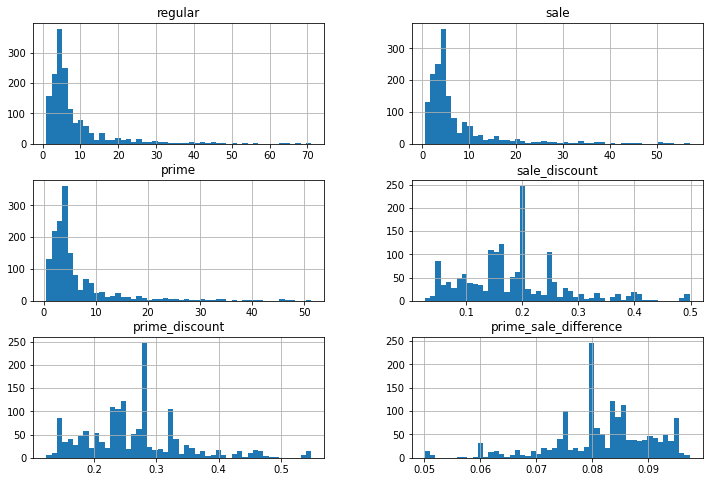

In [12]:
df.hist(bins=50, figsize=(12,8)) 

It looks like during this run there were no products that had a sale price of below zero, this is why we see no outliers in prime_sale_difference above ^

In [13]:
len(df[df['prime_sale_difference'] < 0]) 

0

During this data scrape prime members are getting on average a discount of 26% off, with again an 8% increase in discounts on average on all products

In [14]:
df[df['prime_sale_difference'] > 0].sort_values(by='prime_discount',ascending=False).describe().loc[['mean']]

,regular,sale,prime,sale_discount,prime_discount,prime_sale_difference
mean,8.383871,6.911639,6.21966,0.182038,0.263984,0.081947


In [15]:
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df.sort_values(by='category'), x="prime_discount", y="regular", color="category", title="Products: Regular Price vs Prime Discount by Category", hover_data=['product', 'regular', 'sale', 'prime'], width=1400, height=1000,
labels={
    "regular": "Regular Prices of Products",
    "prime_discount": "Prime Discount by Percent"
})
fig.show()

In [24]:
df['category'][df['prime_discount'] > .4].value_counts()

snacks_chips_salsas_dips    33
Beverages                   19
bread_rolls_bakery          18
frozen_foods                15
pantry_essentials           14
dairy_eggs                   2
supplements                  1
prepared_foods               1
meat                         1
Name: category, dtype: int64